In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from main_preprocess import output_path_lung_wov_attenuation as input_attenuation
from main_preprocess import load_nifti_convert_to_numpy, convert_numpy_to_nifti_and_save

ROI on 0002 and 0018
ROI on 0000 and 0018_2

In [48]:
nifti_path_0000='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0000_SERIES0020.nii'
nifti_path_0002='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0002_SERIES0024.nii.gz'
nifti_path_0018='/Users/bruger/Desktop/Bachelor/attenuation filer/Lung-Pilot-1_0018_SERIES0019.nii.gz'

roi_seg_path_0000='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0000/Segmentation-Segment_1-label.nii.gz'
roi_seg_path_0002='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0002/Segmentation-bilateral_ggo-label.nii.gz'
roi_seg_path_0018='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0018/Segmentation-Segment_1-label.nii.gz'
roi_seg_path_0018_2='/Users/bruger/Desktop/Bachelor/roi_study/roi_seg_series_0018_2/Segmentation-Segment_1-label.nii.gz'

In [49]:
ct_0000 = load_nifti_convert_to_numpy(input_path=nifti_path_0000)
ct_0002 = load_nifti_convert_to_numpy(input_path=nifti_path_0002)
ct_0018 = load_nifti_convert_to_numpy(input_path=nifti_path_0018)

In [50]:
roi_seg_0000 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0000)
roi_seg_0002 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0002)
roi_seg_0018 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0018)
roi_seg_0018_2 = load_nifti_convert_to_numpy(input_path=roi_seg_path_0018_2)

In [51]:
ct_roi_result_0000 = np.multiply(ct_0000,roi_seg_0000)
ct_roi_result_0002 = np.multiply(ct_0002,roi_seg_0002)
ct_roi_result_0018 = np.multiply(ct_0018,roi_seg_0018)
ct_roi_result_0018_2 = np.multiply(ct_0018,roi_seg_0018_2)

In [53]:
output_path_0000='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0000.nii.gz'
output_path_0002='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0002.nii.gz'
output_path_0018='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0018.nii.gz'
output_path_0018_2='/Users/bruger/Desktop/Bachelor/roi_study/roi_ct_results/roi_result_0018_2.nii.gz'

convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0000, output_path=output_path_0000, original_nifti_path=nifti_path_0000)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0002, output_path=output_path_0002, original_nifti_path=nifti_path_0002)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0018, output_path=output_path_0018, original_nifti_path=nifti_path_0018)
convert_numpy_to_nifti_and_save(np_file=ct_roi_result_0018_2, output_path=output_path_0018_2, original_nifti_path=nifti_path_0018)

saving
saving
saving
saving


In [54]:
seg_result_0000_arr = ct_roi_result_0000.flatten()
seg_result_0002_arr = ct_roi_result_0002.flatten()
seg_result_0018_arr = ct_roi_result_0018.flatten()
seg_result_0018_2_arr = ct_roi_result_0018_2.flatten()

In [55]:
seg_result_0000_arr=seg_result_0000_arr[seg_result_0000_arr != 0]
seg_result_0002_arr=seg_result_0002_arr[seg_result_0002_arr != 0]
seg_result_0018_arr=seg_result_0018_arr[seg_result_0018_arr != 0]
seg_result_0018_2_arr=seg_result_0018_2_arr[seg_result_0018_2_arr != 0]

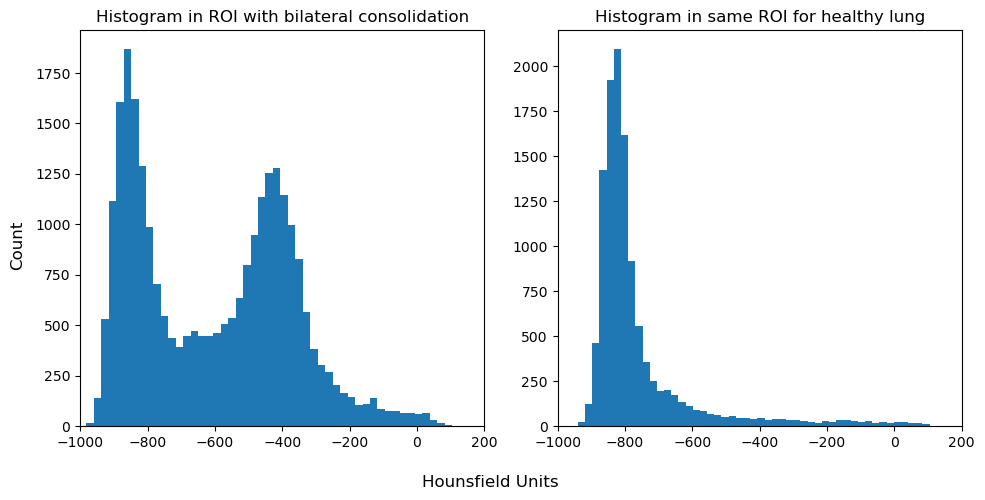

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot histogram for seg_result_0002_arr on the first subplot
axes[0].hist(seg_result_0002_arr, bins=50)
axes[0].set_title('Histogram in ROI with bilateral consolidation')
axes[0].set_xlim(-1000, 200)

# Plot histogram for seg_result_0018_arr on the second subplot
axes[1].hist(seg_result_0018_arr, bins=50)
axes[1].set_title('Histogram in same ROI for healthy lung')
axes[1].set_xlim(-1000, 200)

# Set common x and y labels for both subplots
fig.supxlabel('Hounsfield Units', fontsize=12)
fig.supylabel('Count', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


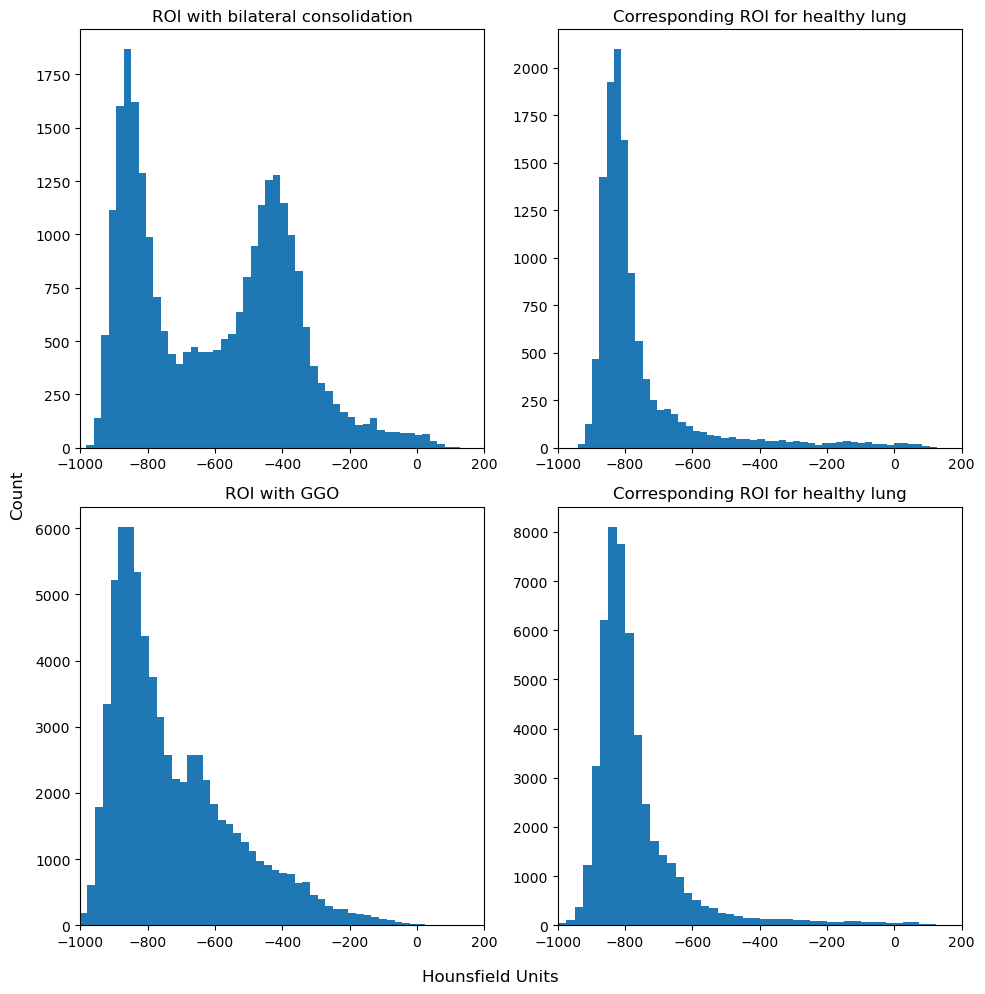

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 

# Plot histogram for seg_result_0002_arr on the first subplot
axes[0, 0].hist(seg_result_0002_arr, bins=50)
axes[0, 0].set_title('ROI with bilateral consolidation')
axes[0, 0].set_xlim(-1000, 200)

# Plot histogram for seg_result_0018_arr on the second subplot
axes[0, 1].hist(seg_result_0018_arr, bins=50)
axes[0, 1].set_title('Corresponding ROI for healthy lung')
axes[0, 1].set_xlim(-1000, 200)

# Plot histogram for seg_result_0000_arr on the third subplot
axes[1, 0].hist(seg_result_0000_arr, bins=50)
axes[1, 0].set_title('ROI with GGO')
axes[1, 0].set_xlim(-1000, 200)

# Plot histogram for seg_result_0018_2_arr on the fourth subplot
axes[1, 1].hist(seg_result_0018_2_arr, bins=50)
axes[1, 1].set_title('Corresponding ROI for healthy lung')
axes[1, 1].set_xlim(-1000, 200)

# Set common x and y labels for both subplots
fig.supxlabel('Hounsfield Units', fontsize=12)
fig.supylabel('Count', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()
